# Decision Tree model in Python

## Table of contents:
 - [1 Load dataset and packages](#1-load)
 - [2 Split the data into test training sets](#2-split)
 - [3 Create a decision tree classifier](#3-create)
 - [4 Make prediction on test data](#4-make)
 - [5 Evaluate the model](#5-evaluate)
 - [6 Visualising the Iris data set](#5-visualise)


# 1 Load dataset and packages <a name="1-load"></a>

To begin, run the code to load the dataset and packages. 

In [1]:
from sklearn import tree # will be used to plot the tree
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

Matplotlib is building the font cache; this may take a moment.


In [2]:
iris_data = load_iris()

# 2 Split the data into test training sets <a name="2-split"></a>

We will need to split the initial dataset into two datasets for the modelling process. Run the code below. 

In [3]:
# use 75% of the data to train the model and 25% for evaluation
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.25, random_state=0)

# 3 Create a decision tree classifier <a name="3-create"></a>

Run the code below to instantiate a decision tree classification model using the [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) class of sklearn and build a decision tree classifier from the training set. We will use the default parameters, which you can recap in the documentation. Run the code below. 

In [4]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

# 4 Make prediction on test data <a name="4-make"></a>

We’re now ready to make our predictions. Run the code below.  

In [5]:
y_pred = clf.predict(X_test)
y_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2])

# 5 Evaluate the model <a name="5-evaluate"></a>

As we did for our KNN modelling, we will use a confusion matrix to compare how the predictions and actual labels compare. We will also generate scores for precision, recall and F1 (a combination of precision and recall). Run the code below.  

In [6]:
# calculate and print the confusion matrix as an array
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(cm)

[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


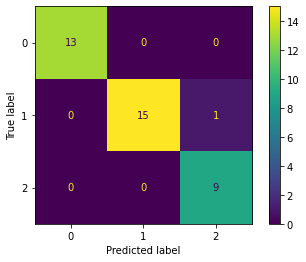

In [7]:
# calculate and display the confusion matrix as a heatmap plot
ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=y_pred)

In the matrix above we can see that most of the predictions were correct, with the only error being a single instance that was inaccurately predicted to be in class 2 (‘virginica’) instead of class 1 (‘versicolor’).  Note that labels are integers, with the numbers corresponding to the order under the target_names attribute. 

In [8]:
iris_data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

i.e., 0 represents setosa, 1 versicolor and 2 virginica. 

In [9]:
# generate the classification report, we pass also target names to print the string labels
report = classification_report(y_test, y_pred, target_names=iris_data.target_names)
print(report)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.94      0.97        16
   virginica       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



> **Precision** is the fraction of correctly predicted instances.

> **Recall** is the fraction of relevant instances that are successfully predicted.

> **F1-score** combines precision and recall. It is the harmonic mean of precision and recall. You can calculate F1-score using the formula below.
$$ F = 2\cdot {{precision\cdot recall}\over{precision + recall}} $$

> **Support** is how many times it appears in test set

The video below demonstrates how the values in the report output above are calculated. 

In [10]:
%%HTML
<video width="100%" controls> 
    <source src="./score[1].mp4" type="video/mp4"> 
</video>

Overall, we can see that the model did a good job on the iris_dataset. Note that the same error (misclassification) affected the different metrics differently. E.g., for versicolor the hit was on recall (0.94) while for virginica it was on precision (0.9). This relates to an important takeaway: you should know what measure is most relevant for your task and optimise the model for that specific measure (since in practice a model (often) can’t be optimised for all measures). A simple example to emphasise this point is that if the model predicts all samples to be in class 0, the recall for that class will be high, whereas the precision will be low (the fraction of that category in the entire dataset). 

# 6 Visualising the Iris data set <a name="6-visualise"></a>

To complete your modelling with decision trees and gain a better understanding of the tree that was created for the iris dataset, we’ll plot the trained decision tree using the [sklearn.tree.plot_tree()](https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html) function. Run the code below.  

[Text(334.8, 489.24, 'petal length (cm) <= 2.35\ngini = 0.665\nsamples = 112\nvalue = [37, 34, 41]\nclass = virginica'),
 Text(251.10000000000002, 380.52000000000004, 'gini = 0.0\nsamples = 37\nvalue = [37, 0, 0]\nclass = setosa'),
 Text(418.5, 380.52000000000004, 'petal length (cm) <= 4.95\ngini = 0.496\nsamples = 75\nvalue = [0, 34, 41]\nclass = virginica'),
 Text(167.4, 271.8, 'petal width (cm) <= 1.65\ngini = 0.153\nsamples = 36\nvalue = [0, 33, 3]\nclass = versicolor'),
 Text(83.7, 163.08000000000004, 'gini = 0.0\nsamples = 32\nvalue = [0, 32, 0]\nclass = versicolor'),
 Text(251.10000000000002, 163.08000000000004, 'sepal width (cm) <= 3.1\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]\nclass = virginica'),
 Text(167.4, 54.360000000000014, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]\nclass = virginica'),
 Text(334.8, 54.360000000000014, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]\nclass = versicolor'),
 Text(669.6, 271.8, 'petal width (cm) <= 1.75\ngini = 0.05\nsamples = 39\nvalue =

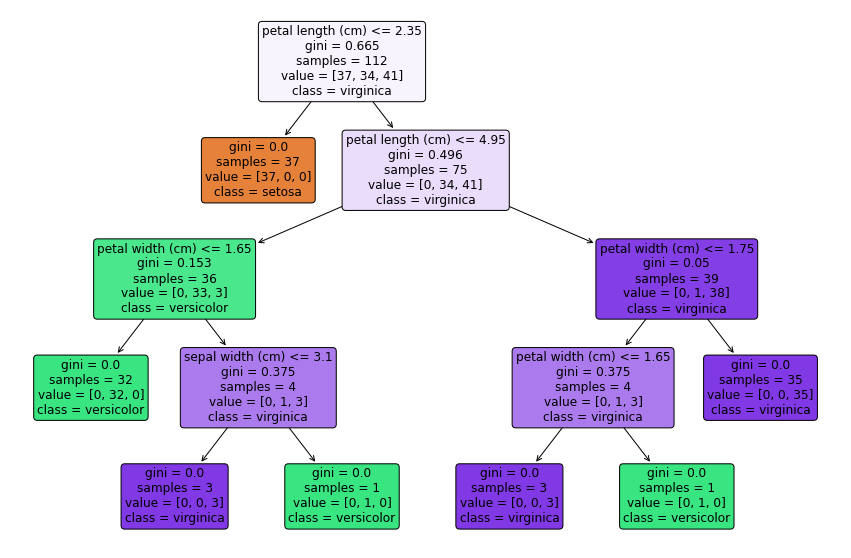

In [11]:
# set the figure size
plt.figure(figsize=(15,10))
# plot the decision tree
tree.plot_tree(decision_tree=clf, feature_names=iris_data.feature_names, class_names=iris_data.target_names,\
               filled=True, rounded=True)

Here are the explanations of the codes:

- `clf` : decision tree classifier
The decision tree to be visualised
- `out_file` : file object or string, optional (`default='tree.dot'`)exported to GraphViz.
- `feature_names` : list of strings, optional (`default=None`)
Names of each of the features.
- `class_names`: list of `string`, `bool` or None, optional (`default=None`)
Names of each of the target classes in ascending numerical order.
- `filled` : `bool`, optional (`default=False`)
When set to `True`, paint nodes to indicate majority class for - classification, extremity of values for regression, or purity of node for multi-output.
- `rounded` : `bool`, optional (`default=False`)
When set to `True`, draw node boxes with rounded corners and use Helvetica fonts instead of Times-Roman.
- `special_characters` : `bool`, optional (`default=False`)
When set to False, ignore special characters for PostScript compatibility.

Legend for the outputted plot above: 

 * samples – number of samples in the training set that reached that node 

 * value – a list with counts of every class in that node, with the color corresponding to the majority class 

 * class – indicates the majority of samples in the node 

In the plot above we can see the decision tree and from that understand the decision path (or why a sample would be classified in one class or another). As a simple example look at the root node. The root note checks if the feature “petal width (cm)” is less or equal to 0.8, if it is (go left) the sample will be classified with the label 0 (setosa), otherwise (go right) it will check if the feature “petal length (cm)” is less or equal to 4.95 and go left if it is and right otherwise until it reaches a leaf (aka terminal node). This helps us to understand the reasoning behind the classifications of the model in a transparent way, which is one of the advantages of this model.  

<div class="warning" style='padding:0.1em; background-color:#e6ffff'>
<span>
<p style='margin:1em;'>
<b>Congratulations!</b></p>
<p style='margin:1em;'>
You’ve now completed your first exercise classifying with decision tress. This will be important to your upcoming assessment. To revise this activity, return to the Canvas page and read over the content under “What you’ll learn”. </p>
<p style='margin-bottom:1em; margin-right:1em; text-align:right; font-family:Georgia'>
</p></span>
</div>